# Ep300 validation figures
- goal: create Ep300 validation figures for manuscript
- input: log (fold change) compared to control conditions and statistical test results
- output: figures

In [1]:
# libraries
library("tidyverse")
library("ggplot2")
library("dplyr")
library("patchwork")
options(warn = -1)  # Suppress warnings globally

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
options(tibble.width = Inf)

In [3]:
# helper functions

# default plotting theme
macro_theme <- function(){
    
    # settings
    font <- "Arial"
    size <- 6
    
    theme_classic(
        base_size=size,
        base_family = font
    ) %+replace% 
    
    theme(
      #grid elements
#       panel.grid.major = element_blank(),    #strip major gridlines
#       panel.grid.minor = element_blank(),    #strip minor gridlines
#       axis.ticks = element_blank(),          #strip axis ticks
      
#       strips axis lines ?
      
      #text elements
        text = element_text(              
                   family = font,           
                   size = size),
        
      plot.title = element_text(             #title
                   family = font,            #set font family
                   size = size,                #set font size
                   face = 'bold',            #bold typeface
                   hjust = 0.5,                #center align
                   vjust = 2),               #raise slightly
      
      plot.subtitle = element_text(          #subtitle
                   family = font,            #font family
                   size = size),               #font size
      
      plot.caption = element_text(           #caption
                   family = font,            #font family
                   size = size,                 #font size
                   hjust = 0.5),               #center align
      
      axis.title = element_text(             #axis titles
                   family = font,            #font family
                   size = size),               #font size
      
      axis.text = element_text(              #axis text
                   family = font,            #axis famuly
                   size = size),                #font size
        
        legend.text = element_text(              #axis text
                   family = font,            #axis famuly
                   size = size), 
        
        legend.title = element_text(              #axis text
                   family = font,            #axis famuly
                   size = size),
      
#       axis.text.x = element_text(            #margin for axis text
#                     margin=margin(5, b = 10))
    )
}

# extended ggsave
ggsave_new <- function(filename, results_path, plot, width=5, height=5, dpi=300){    
    ggsave(
          paste0(filename,'.pdf'),
          plot = plot,
          device = cairo_pdf,
          path = file.path(results_path),
          scale = 1,
          dpi = dpi,
            width = width,
            height = height,
          limitsize = FALSE,
        )
}

In [4]:
# set correct working directory -> project folder
getwd()
setwd('..')
getwd()

[1] "/home/sreichl/projects/bmdm-stim/src"

[1] "/home/sreichl/projects/bmdm-stim"

# configs

In [5]:
# configs
data_path <- file.path('Ep300_validation')

# Load data

In [6]:
# save results
inh_results <- read_csv(file.path(data_path, "Ep300_inh_pfaffl_qPCR_results.csv"))
inh_stats <- read_csv(file.path(data_path, "Ep300_inh_pfaffl_qPCR_statistics.csv"))

Rows: 216 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Timepoint, Drug, Stimulation, Primer
dbl (9): Replicate, efficiency, mean_dCq, DMSO_mean_dCq, ddCq, fold_ddCq, lo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 48 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Primer, Timepoint, Drug, Stimulation
dbl (7): n, mean_log2FC_ddCq, sd_log2FC_ddCq, t_pvalue_ddCq, mean_log2FC_pfa...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
# save results
ko_IFNb_results <- read_csv(file.path(data_path, "Ep300_ko_IFNb_pfaffl_qPCR_results.csv"))
ko_IFNb_stats <- read_csv(file.path(data_path, "Ep300_ko_IFNb_pfaffl_qPCR_statistics.csv"))

Rows: 90 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Guide, Primer
dbl (9): Harvest, efficiency, mean_dCq, ref_mean_dCq, ddCq, fold_ddCq, log2F...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 24 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Primer, Guide
dbl (7): n, mean_log2FC_ddCq, sd_log2FC_ddCq, t_pvalue_ddCq, mean_log2FC_pfa...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
# save results
ko_untreated_results <- read_csv(file.path(data_path, "Ep300_ko_untreated_pfaffl_qPCR_results.csv"))
ko_untreated_stats <- read_csv(file.path(data_path, "Ep300_ko_untreated_pfaffl_qPCR_statistics.csv"))

Rows: 90 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Guide, Primer
dbl (10): Plate, Harvest, efficiency, mean_dCq, ref_mean_dCq, ddCq, fold_ddC...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 24 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Primer, Guide
dbl (7): n, mean_log2FC_ddCq, sd_log2FC_ddCq, t_pvalue_ddCq, mean_log2FC_pfa...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# 2h IFNb treated

## CRISPR KO

In [9]:
# relabel results
ko_IFNb_results <- ko_IFNb_results %>%
  mutate(Guide = str_replace_all(Guide, c("EP300" = "Ep300", "NT-2" = "Non-Targeting 2")))

# remove NT-1 data for plotting, rename and reorder columns
results_plot <- ko_IFNb_results %>%
  filter(Guide != "NT-1", Guide != "WT") %>%
  mutate(
    Primer = factor(Primer, levels = c("Spp1", "Gbp2", "Ifit1", "Irf7", "Oasl2", "Usp18")),
    Guide  = factor(Guide, levels = c("Non-Targeting 2", "Ep300-1", "Ep300-2"))
  )

In [10]:
# relabel stats
ko_IFNb_stats <- ko_IFNb_stats %>%
  mutate(Guide = str_replace_all(Guide, c("EP300" = "Ep300", "NT-2" = "Non-Targeting 2")))

In [11]:
# adjust p-values for each condition separately as they are independent questions
ko_IFNb_stats <- ko_IFNb_stats %>%
  group_by(Guide) %>%
  mutate(
    t_adjP_pfaffl  = p.adjust(t_pvalue_pfaffl, method = "BH")
  ) %>%
  ungroup()

In [12]:
# mark adjusted p-values <= 0.05 with an asterisk
stats_results <- ko_IFNb_stats %>%
mutate(
    sig_label = ifelse(t_adjP_pfaffl <= 0.05, "*", ""),
    Primer = factor(Primer, levels = c("Spp1","Gbp2","Ifit1","Irf7","Oasl2","Usp18")),
    Guide  = factor(Guide, levels = c("Non-Targeting 2", "Ep300-1", "Ep300-2"))
  )

star_positions <- results_plot %>%
  group_by(Primer, Guide) %>%
  summarize(
    ypos = max(log2FC_pfaffl, na.rm = TRUE),
    .groups = "drop"
  )

stats_for_plot <- star_positions %>%
  left_join(stats_results, by = c("Primer","Guide"))%>%
mutate(
    Primer = factor(Primer, levels = c("Spp1","Gbp2","Ifit1","Irf7","Oasl2","Usp18")),
    Guide  = factor(Guide, levels = c("Non-Targeting 2", "Ep300-1", "Ep300-2"))
  )

In [13]:
width <- 2
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

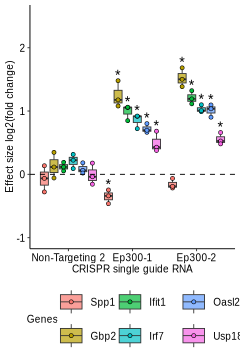

In [14]:
# plot as box plots
p_ko_IFNb_results <- results_plot %>%
  ggplot(aes(
    x      = Guide, 
    y      = log2FC_pfaffl, 
    fill   = Primer
  ), color  = "black") +
  # Boxplot, grouped by both Guide & Primer
  geom_boxplot(
    aes(group = interaction(Guide, Primer)),
    position = position_dodge(width = 0.9),
    alpha    = 0.7,
    outlier.shape = NA,
      linewidth = 0.25
  ) +
  # replicate points
  geom_point(
    aes(group = interaction(Guide, Primer)),
    position = position_dodge(width=0.9),
    size     = 1,
    shape    = 21,
    stroke   = 0.25
  ) +
  # Horizontal reference line at 0
  geom_hline(yintercept = 0, linetype = "dashed", linewidth = 0.25) +
    # geom_vline(xintercept = "EP300-1", linetype = "dashed") +
  # Facet in one row
  # facet_wrap(~ Timepoint + Stimulation, ncol = 4, scales = "fixed") +
  # Axis & legend labels
  labs(
    x    = "CRISPR single guide RNA",
    y    = "Effect size log2(fold change)",
    fill = "Genes",
    color= "Genes"
  ) +
  theme_bw() +
  # Add significance stars (if p<=0.05 => "*")
    geom_text(
        data     = stats_for_plot,
        aes(group = interaction(Guide, Primer),
            y     = ypos,
           label=sig_label
           ),
            position = position_dodge(width = 0.9),
    vjust    = -0.1,
    size     = 3,
    )+
scale_color_identity(guide = "none")+  ylim(-1, 2.5) + macro_theme() + theme(legend.position = "bottom", 
        legend.justification = "center")#theme(legend.position = "none")

p_ko_IFNb_results

## Chemical inhibition

In [15]:
# relabel results
inh_results <- inh_results %>%
  mutate(Drug = str_replace_all(Drug, c("A485" = "A-485")))

# remove DMSO data for plotting and reorder columns
results_plot <- inh_results %>%
  filter(Drug != "DMSO", Timepoint == "24h", Stimulation == "2h IFNb")%>%
mutate(
    Primer = factor(Primer, levels = c("Spp1","Gbp2","Ifit1","Irf7","Oasl2","Usp18")),
    Drug   = factor(Drug,   levels = c("SGC-CBP30","A-485"))
  )

print(dim(results_plot))
head(results_plot)

[1] 36 13


Replicate,Timepoint,Drug,Stimulation,Primer,efficiency,mean_dCq,DMSO_mean_dCq,ddCq,fold_ddCq,log2FC_ddCq,fold_pfaffl,log2FC_pfaffl
<dbl>,<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24h,A-485,2h IFNb,Gbp2,1.910299,0.5019391,2.7051777,-2.2032387,4.605120,2.2032387,4.162301,2.0573812
1,24h,A-485,2h IFNb,Ifit1,1.926311,0.5952359,2.3197167,-1.7244809,3.304612,1.7244809,3.097458,1.6310847
1,24h,A-485,2h IFNb,Irf7,1.777254,-0.8368944,0.6543379,-1.4912323,2.811290,1.4912323,2.357407,1.2372009
1,24h,A-485,2h IFNb,Oasl2,1.836000,1.3579273,2.2640297,-0.9061024,1.873976,0.9061024,1.734186,0.7942583
1,24h,A-485,2h IFNb,Spp1,1.863823,3.1893186,3.5271987,-0.3378801,1.263898,0.3378801,1.234140,0.3035058
1,24h,A-485,2h IFNb,Usp18,1.755833,-2.1635826,-1.3824717,-0.7811108,1.718454,0.7811108,1.552274,0.6343835


In [16]:
# relabel stats
inh_stats <- inh_stats %>%
  mutate(Drug = str_replace_all(Drug, c("A485" = "A-485")))

In [17]:
# adjust p-values for each condition separately as they are independent questions
inh_stats <- inh_stats %>%
  group_by(Drug, Timepoint, Stimulation) %>%
  mutate(
    t_adjP_pfaffl  = p.adjust(t_pvalue_pfaffl, method = "BH")
  ) %>%
  ungroup()

In [18]:
# mark p-values <= 0.05 with an asterisk
stats_results <- inh_stats %>%
filter(Timepoint == "24h", Stimulation == "2h IFNb") %>%
mutate(sig_label = ifelse(t_adjP_pfaffl <= 0.05, "*", ""))

star_positions <- results_plot %>%
  group_by(Primer, Timepoint, Drug, Stimulation) %>%
  summarize(
    ypos = max(log2FC_pfaffl, na.rm = TRUE),
    .groups = "drop"
  )

stats_for_plot <- star_positions %>%
  left_join(stats_results, by = c("Primer","Timepoint", "Drug", "Stimulation"))%>%
  mutate(
    Primer = factor(Primer, levels = c("Spp1","Gbp2","Ifit1","Irf7","Oasl2","Usp18")),
    Drug   = factor(Drug,   levels = c("SGC-CBP30","A-485"))
  )

In [19]:
width <- 3
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

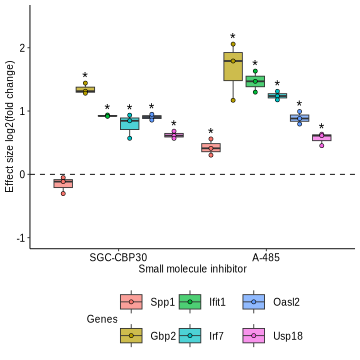

In [20]:
# plot as box plots
dodge_width <- 0.9 #0.9

p_inh_IFNb_results <- results_plot %>%
  ggplot(aes(
    x      = Drug, 
    y      = log2FC_pfaffl, 
    fill   = Primer
  ), color  = "black") +
  # Boxplot, grouped by both Drug & Primer
  geom_boxplot(
    aes(group = interaction(Drug, Primer)),
    position = position_dodge(width = dodge_width),
    alpha    = 0.7,
    outlier.shape = NA,
      linewidth = 0.25
  ) +
  # replicate points
  geom_point(
    aes(group = interaction(Drug, Primer)),
    position = position_dodge(width = dodge_width),
    size     = 1,
    shape    = 21,
    stroke   = 0.25
  ) +
  # Horizontal reference line at 0
  geom_hline(yintercept = 0, linetype = "dashed", linewidth = 0.25) +
  # Axis & legend labels
  labs(
    x    = "Small molecule inhibitor",
    y    = "Effect size log2(fold change)",
    fill = "Genes",
    color= "Genes"
  ) +
  # Add significance stars (if p<=0.05 => "*")
    geom_text(
        data     = stats_for_plot,
        aes(group = interaction(Drug, Primer),
            y     = ypos,
           label = sig_label
           ),
            position = position_dodge(width = dodge_width),
    vjust    = -0.1,
    size     = 3,
    )+
scale_color_identity(guide = "none") +  ylim(-1, 2.5) + macro_theme() + theme(legend.position = "bottom", 
        legend.justification = "center")

p_inh_IFNb_results

## Combine & save

In [21]:
width <- 3 #2.57 in
height <- 2.5 # 1.7in but room up to 2.2
options(repr.plot.width=width, repr.plot.height=height)

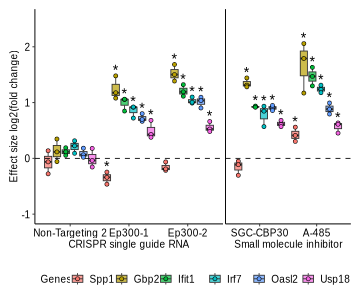

In [22]:
p_IFNb <- (p_ko_IFNb_results + theme(plot.margin = margin(0,0,0,0))) + 
  (p_inh_IFNb_results+ theme(axis.title.y = element_blank(), axis.text.y = element_blank(), axis.ticks.y = element_blank(),plot.margin = margin(0,0,0,0))) + 
  plot_layout(guides = "collect", widths = c(3, 2))& 
  theme(#panel.border = element_rect(color = "black", fill = NA, linewidth = 0.8),  # Add black border
      legend.position = "bottom", 
        legend.justification = "center",
        legend.box = "horizontal",
       legend.key.size = unit(0.3, "cm")) &
   guides(fill = guide_legend(nrow = 1), color = guide_legend(nrow = 1))

p_IFNb

In [23]:
# save plot
ggsave_new(filename="Ep300_IFNb",
           results_path=data_path,
           plot=p_IFNb,
           width=width,
           height=height
          )

# Untreated

## CRISPR KO

In [24]:
# relabel results
ko_untreated_results <- ko_untreated_results %>%
  mutate(Guide = str_replace_all(Guide, c("EP300" = "Ep300", "NT-2" = "Non-Targeting 2")))

# remove NT-1 data for plotting, rename and reorder columns
results_plot <- ko_untreated_results %>%
  filter(Guide != "NT-1", Guide != "WT") %>%
  mutate(
    Primer = factor(Primer, levels = c("Spp1", "Gbp2", "Ifit1", "Irf7", "Oasl2", "Usp18")),
    Guide  = factor(Guide, levels = c("Non-Targeting 2", "Ep300-1", "Ep300-2"))
  )

In [25]:
# relabel stats
ko_untreated_stats <- ko_untreated_stats %>%
  mutate(Guide = str_replace_all(Guide, c("EP300" = "Ep300", "NT-2" = "Non-Targeting 2")))

In [26]:
# adjust p-values for each condition separately as they are independent questions
ko_untreated_stats <- ko_untreated_stats %>%
  group_by(Guide) %>%
  mutate(
    t_adjP_pfaffl  = p.adjust(t_pvalue_pfaffl, method = "BH")
  ) %>%
  ungroup()

In [27]:
# mark p-values <= 0.05 with an asterisk
stats_results <- ko_untreated_stats %>%
mutate(sig_label = ifelse(t_adjP_pfaffl <= 0.05, "*", ""),
    Primer = factor(Primer, levels = c("Spp1","Gbp2","Ifit1","Irf7","Oasl2","Usp18")),
    Guide  = factor(Guide, levels = c("Non-Targeting 2", "Ep300-1", "Ep300-2"))
  )

star_positions <- results_plot %>%
  group_by(Primer, Guide) %>%
  summarize(
    ypos = max(log2FC_pfaffl, na.rm = TRUE),
    .groups = "drop"
  )

stats_for_plot <- star_positions %>%
  left_join(stats_results, by = c("Primer","Guide"))%>%
mutate(
    Primer = factor(Primer, levels = c("Spp1","Gbp2","Ifit1","Irf7","Oasl2","Usp18")),
    Guide  = factor(Guide, levels = c("Non-Targeting 2", "Ep300-1", "Ep300-2"))
  )

In [28]:
width <- 2
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

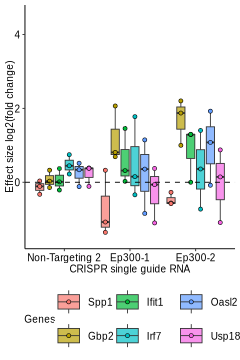

In [29]:
# plot as box plots
p_ko_untreated_results <- results_plot %>%
  ggplot(aes(
    x      = Guide, 
    y      = log2FC_pfaffl, 
    fill   = Primer
  ), color  = "black") +
  # Boxplot, grouped by both Guide & Primer
  geom_boxplot(
    aes(group = interaction(Guide, Primer)),
    position = position_dodge(width = 0.9),
    alpha    = 0.7,
    outlier.shape = NA,
      linewidth = 0.25
  ) +
  # replicate points
  geom_point(
    aes(group = interaction(Guide, Primer)),
    position = position_dodge(width=0.9),
    size     = 1,
    shape    = 21,
    stroke   = 0.25
  ) +
  # Horizontal reference line at 0
  geom_hline(yintercept = 0, linetype = "dashed", linewidth = 0.25) +
    # geom_vline(xintercept = "EP300-1", linetype = "dashed") +
  # Facet in one row
  # facet_wrap(~ Timepoint + Stimulation, ncol = 4, scales = "fixed") +
  # Axis & legend labels
  labs(
    x    = "CRISPR single guide RNA",
    y    = "Effect size log2(fold change)",
    fill = "Genes",
    color= "Genes"
  ) +
  theme_bw() +
  # Add significance stars (if p<=0.05 => "*")
    geom_text(
        data     = stats_for_plot,
        aes(group = interaction(Guide, Primer),
            y     = ypos,
           label=sig_label
           ),
            position = position_dodge(width = 0.9),
    vjust    = -0.1,
    size     = 3,
    )+
scale_color_identity(guide = "none")+  ylim(-1.5, 4.5) + macro_theme() + theme(legend.position = "bottom", 
        legend.justification = "center")

p_ko_untreated_results

## Chemical inhibition

In [30]:
# relabel results
inh_results <- inh_results %>%
  mutate(Drug = str_replace_all(Drug, c("A485" = "A-485")))

# remove DMSO data for plotting and reorder columns
results_plot <- inh_results %>%
  filter(Drug != "DMSO", Timepoint == "24h", Stimulation == "Unchallenged")%>%
mutate(
    Primer = factor(Primer, levels = c("Spp1","Gbp2","Ifit1","Irf7","Oasl2","Usp18")),
    Drug   = factor(Drug,   levels = c("SGC-CBP30","A-485"))
  )

print(dim(results_plot))
head(results_plot)

[1] 36 13


Replicate,Timepoint,Drug,Stimulation,Primer,efficiency,mean_dCq,DMSO_mean_dCq,ddCq,fold_ddCq,log2FC_ddCq,fold_pfaffl,log2FC_pfaffl
<dbl>,<chr>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24h,A-485,Unchallenged,Gbp2,1.910299,5.39342531,9.8206958,-4.4272705,21.5149938,4.4272705,17.5594905,4.1341791
1,24h,A-485,Unchallenged,Ifit1,1.926311,2.40471736,6.0916339,-3.6869166,12.8787134,3.6869166,11.2140603,3.4872368
1,24h,A-485,Unchallenged,Irf7,1.777254,-1.90388870,0.8594167,-2.7633054,6.7895001,2.7633054,4.8993023,2.2925763
1,24h,A-485,Unchallenged,Oasl2,1.836000,1.55264478,4.8401603,-3.2875155,9.7642923,3.2875155,7.3702999,2.8817233
1,24h,A-485,Unchallenged,Spp1,1.863823,2.75001739,2.2366666,0.5133508,0.7005934,-0.5133508,0.7264196,-0.4611249
1,24h,A-485,Unchallenged,Usp18,1.755833,-0.01683683,1.1646459,-1.1814827,2.2680976,1.1814827,1.9447001,0.9595477


In [31]:
# relabel stats
inh_stats <- inh_stats %>%
  mutate(Drug = str_replace_all(Drug, c("A485" = "A-485")))

In [32]:
# was already adjusted
# # adjust p-values for each condition separately as they are independent questions
# inh_stats <- inh_stats %>%
#   group_by(Drug, Timepoint, Stimulation) %>%
#   mutate(
#     t_adjP_pfaffl  = p.adjust(t_pvalue_pfaffl, method = "BH")
#   ) %>%
#   ungroup()

In [33]:
# mark p-values <= 0.05 with an asterisk
stats_results <- inh_stats %>%
filter(Timepoint == "24h", Stimulation == "Unchallenged") %>%
mutate(sig_label = ifelse(t_adjP_pfaffl <= 0.05, "*", ""))

star_positions <- results_plot %>%
  group_by(Primer, Timepoint, Drug, Stimulation) %>%
  summarize(
    ypos = max(log2FC_pfaffl, na.rm = TRUE),
    .groups = "drop"
  )

stats_for_plot <- star_positions %>%
  left_join(stats_results, by = c("Primer","Timepoint", "Drug", "Stimulation"))%>%
  mutate(
    Primer = factor(Primer, levels = c("Spp1","Gbp2","Ifit1","Irf7","Oasl2","Usp18")),
    Drug   = factor(Drug,   levels = c("SGC-CBP30","A-485"))
  )

In [34]:
width <- 3
height <- 3
options(repr.plot.width=width, repr.plot.height=height)

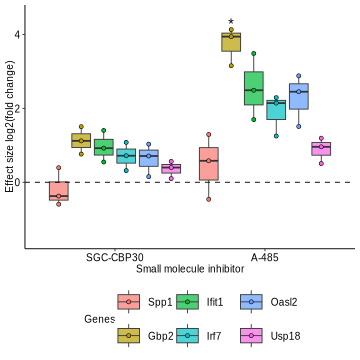

In [35]:
# plot as box plots
dodge_width <- 0.9 #0.9

p_inh_untreated_results <- results_plot %>%
  ggplot(aes(
    x      = Drug, 
    y      = log2FC_pfaffl, 
    fill   = Primer
  ), color  = "black") +
  # Boxplot, grouped by both Drug & Primer
  geom_boxplot(
    aes(group = interaction(Drug, Primer)),
    position = position_dodge(width = dodge_width),
    alpha    = 0.7,
    outlier.shape = NA,
      linewidth = 0.25
  ) +
  # replicate points
  geom_point(
    aes(group = interaction(Drug, Primer)),
    position = position_dodge(width = dodge_width),
    size     = 1,
    shape    = 21,
    stroke   = 0.25
  ) +
  # Horizontal reference line at 0
  geom_hline(yintercept = 0, linetype = "dashed", linewidth = 0.25) +
  # Axis & legend labels
  labs(
    x    = "Small molecule inhibitor",
    y    = "Effect size log2(fold change)",
    fill = "Genes",
    color= "Genes"
  ) +
  # Add significance stars (if p<=0.05 => "*")
    geom_text(
        data     = stats_for_plot,
        aes(group = interaction(Drug, Primer),
            y     = ypos,
           label = sig_label
           ),
            position = position_dodge(width = dodge_width),
    vjust    = -0.1,
    size     = 3,
    )+
scale_color_identity(guide = "none") +  ylim(-1.5, 4.5) + macro_theme() + theme(legend.position = "bottom", 
        legend.justification = "center")

p_inh_untreated_results

## Combine & save

In [36]:
width <- 3 #2.57 in
height <- 2.5 # 1.7in but room up to 2.2
options(repr.plot.width=width, repr.plot.height=height)

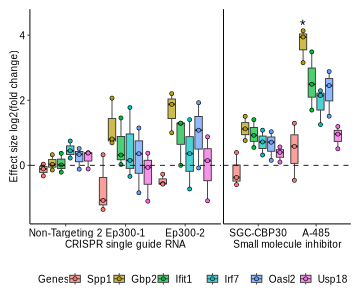

In [37]:
p_untreated <- (p_ko_untreated_results + theme(plot.margin = margin(0,0,0,0))) + 
  (p_inh_untreated_results+ theme(axis.title.y = element_blank(), axis.text.y = element_blank(), axis.ticks.y = element_blank(),plot.margin = margin(0,0,0,0))) + 
  plot_layout(guides = "collect", widths = c(3, 2))& 
  theme(#panel.border = element_rect(color = "black", fill = NA, linewidth = 0.8),  # Add black border
      legend.position = "bottom", 
        legend.justification = "center",
        legend.box = "horizontal",
       legend.key.size = unit(0.3, "cm")) &
   guides(fill = guide_legend(nrow = 1), color = guide_legend(nrow = 1))


p_untreated


In [38]:
# save plot
ggsave_new(filename="Ep300_untreated",
           results_path=data_path,
           plot=p_untreated,
           width=width,
           height=height
          )